# Polytopes

A (convex) polytope can be defined in at least two equivalent ways.

## Polytopes as convex hulls

Suppose $V = \mathbb{R}^n$ is a vector space. Let $S\subset V$ be a *finite* set of points.

The set $S = \{x_1, \dots, x_k\}$ determines a *polytope* $P$ by taking the *convex hull*:
$$
    P = \mathrm{conv}(S) = \left\{ \lambda_1 x_1 + \cdots + \lambda_kx_k ~\middle|~ \lambda_i\geqslant 0,\ \lambda_1 + \cdots + \lambda_k = 1 \right\}.
$$

If $n=2$, we call polytopes *polygons*.

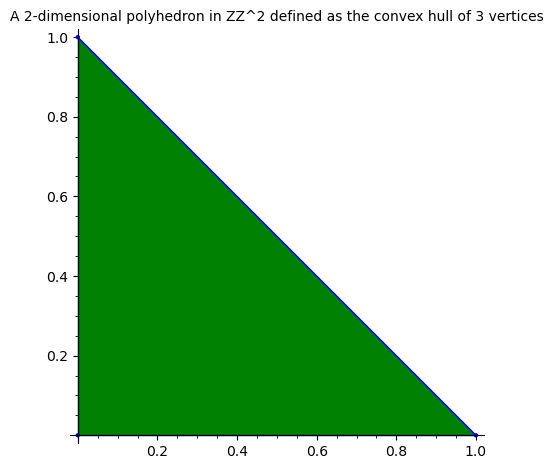

In [1]:
S = [(0, 0), (1, 0), (0, 1)]
P = Polyhedron(S)
P

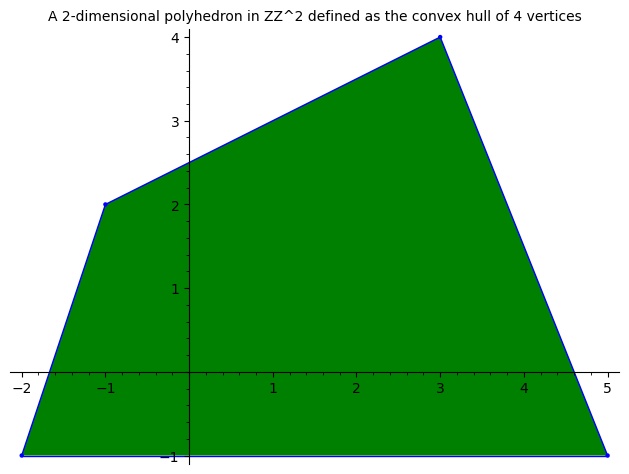

In [3]:
S = [(-1, 2), (3, 4), (-2, -1), (5, -1)]
P = Polyhedron(S)
P

In [9]:
S = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (1/2, 1/2, 1/2)]
P = Polyhedron(S)
P.plot()

Graphics3d Object

In [10]:
P.render_wireframe()

Graphics3d Object

## Polytopes as intersections of half-spaces